### IMPORTANDO CSV

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### RENOMEANDO AS COLUNAS

In [6]:
a_renomear = {
    "expected_hours" : "horas_esperadas",
    "price": "preco",
    "unfinished" : "nao_finalizado"
}

dados = dados.rename(columns = a_renomear)

dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### CRIANDO A COLUNA FINALIZADO PARA AJUDAR NA SOLUÇÃO DO PROBLEMA, POIS NÃO FINALIZADO NÃO É DE FACIL COMPREENSÃO 

In [10]:
troca = {0: 1,
         1:0}
dados['finalizado'] = dados.nao_finalizado.map(troca)

dados

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


### VISUALIZANDO OS DADOS ATRAVÉS DE GRÁFICO PARA MELHOR ENTENDIMENTO

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

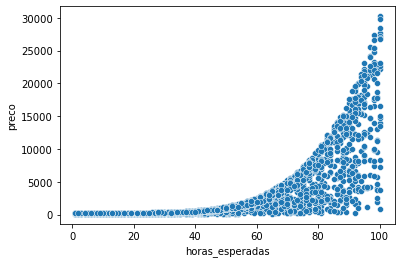

In [7]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas",y="preco",data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

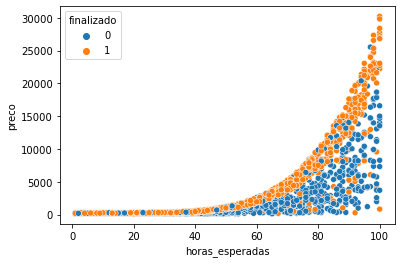

In [16]:
sns.scatterplot(x="horas_esperadas",y="preco",data=dados,hue="finalizado")

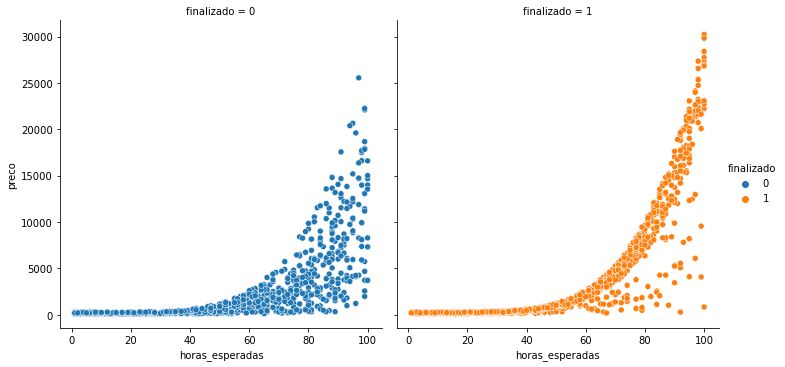

In [18]:
sns.relplot(x="horas_esperadas",y="preco",data=dados,col="finalizado",hue="finalizado")

### TREINANDO O ALGORITIMO COM OS TESTES E TREINO

In [19]:
x = dados [["horas_esperadas","preco"]]
y = dados["finalizado"]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 8

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 58.52%


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### A ACURACIA FOI BAIXA, FAZER UMA ALGORITIMO DE BASE LINE CHUTANDO TUDO 1 PARA AS PREVISOES E VER SE O TREINO ESTA BOM COMPARADO COM O TREINO REAL

In [105]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritimo de baseline foi  %.2f%%" % acuracia)

A acurácia do algoritimo de baseline foi  52.59%


### ATRÁVES DO GRAFICO FOI INDENTIFADO UM PADRÃO COM A BASE DE DADOS, PORÉM A ACUARIA ESTA BAIXA

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

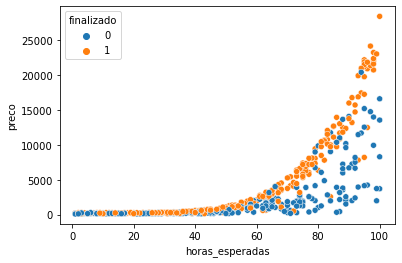

In [106]:
sns.scatterplot(x="horas_esperadas",y="preco",data=teste_x,hue=teste_y)

### PEGAR TODOS OS PONTOS DO GRAFICO E CHUTAR UM VALOR PARA HORAS ESPERADAS E PREÇO E TREINAR NOVAMENTE, COM MAIS DADOS.

In [107]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min,x_max,y_min,y_max)

1 100 101 28398


In [108]:
pixels = 100
eixo_x = np.arange(x_min,x_max , (x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max , (y_max - y_min) / pixels)

### PEGANDO OS VALORES E JUNTANDO EM UMA MATRIX DE X Y E FAZENDO A PREDIÇÃO DO MODELO

In [120]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z.shape
z = z.reshape(xx.shape)

(100, 100)

 ### AQUI PODEMOS VER QUE NÃO ESTA BOM MESMO APÓS ESSE TREINO, POIS AO PLOTAR O CONTORNO DOS X E Y DOS GRAFICOS E A PREDIÇÃO , O COTORNO FICOU LINEAR E NÃO ESTA DE ACORDO COM A ANALISE INICIAL DOS DADOS


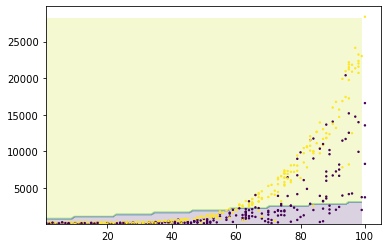

In [110]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z,alpha=0.2)
plt.scatter(teste_x.horas_esperadas,teste_x.preco, c=teste_y,s = 2)